# Introduction To Multi-Class Classification

When the output labels have more than two classes, it is called as multi-class classification. While there are more than two classes possible, each instance can be associated with only one output class.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

## [1] Loading The Data From Tensorflow Datasets

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [13]:
print(f'train_images.shape {train_images.shape} train_labels.shape {train_labels.shape}')
print(f'test_images.shape {test_images.shape} test_labels.shape {test_labels.shape}')

train_images.shape (60000, 28, 28) train_labels.shape (60000,)
test_images.shape (10000, 28, 28) test_labels.shape (10000,)


In [3]:
# map the classes to the labels
classes = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'boot']

## [2] Visualize The Data

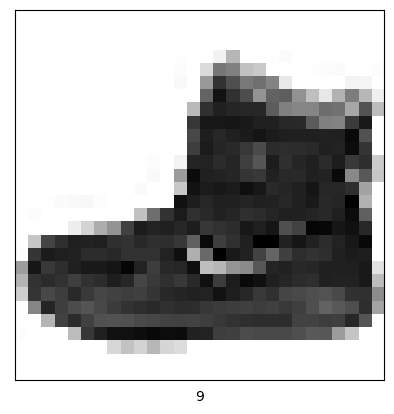

In [22]:
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.xlabel(train_labels[0])
plt.show()

In [31]:
def show_image(image, label):
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(label)

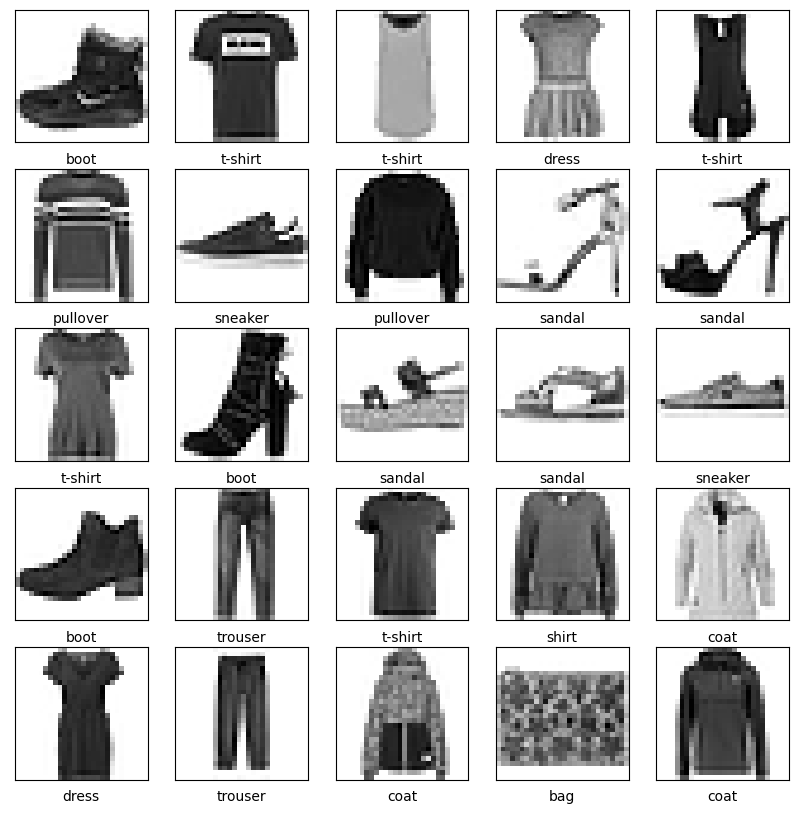

In [41]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5,5,i+1)
    show_image(train_images[i], classes[train_labels[i]])
plt.show()

## [3] Build And Train The Neural Network Model

The neural network used for multi-class classification is not much different from that of binary classification. The main hyper-parameter that changes is the activation function - for multi-class classifiction we use **softmax loss function** instead of **sigmoid loss function** for the output layer.   

In [33]:
tf.random.set_seed(42)

### [3.a] Working With Vanilla Neural Network

The first iteration of the model is built vanilla style

In [35]:
# build the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

# fit the model
history = model.fit(train_images, train_labels, epochs=10)

Metal device set to: Apple M1 Pro
Epoch 1/10


2023-01-19 08:17:41.046647: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-19 08:17:41.046858: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2023-01-19 08:17:41.189031: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


   1/1875 [..............................] - ETA: 8:50 - loss: 132.5895 - accuracy: 0.1250

2023-01-19 08:17:41.321496: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 9s 5ms/step - loss: 3.6454 - accuracy: 0.6975
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7021 - accuracy: 0.7397
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6096 - accuracy: 0.7825
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5447 - accuracy: 0.8150
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5186 - accuracy: 0.8271
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5010 - accuracy: 0.8333
Epoch 7/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.4939 - accuracy: 0.8367
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4864 - accuracy: 0.8399
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4809 - accuracy: 0.8422
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4714 - accurac

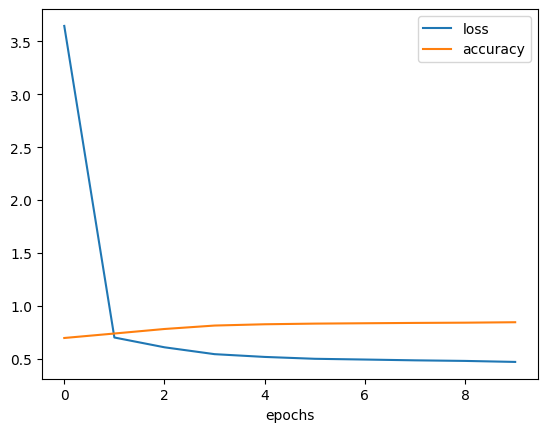

In [38]:
# visualize the model performance
pd.DataFrame(history.history).plot(xlabel='epochs')
plt.show()

### [3.b] Normalization

Neural networks work best when the data is normalized - the i.e. the input data values are within the same range **[0,1]**. One of the easiest ways to normalize the data is to divide every value in the dataset with the maximum value of that dataset.

Rebuild the neural network model and run it on the normalized data

In [42]:
# normalize the input data
train_images_normalized = train_images / 255.0
test_images_normalized = test_images / 255.0

In [54]:
# build the model
_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# compile the model
_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

# fit the model
_history = _model.fit(train_images_normalized, train_labels, epochs=20)

Epoch 1/20
  23/1875 [..............................] - ETA: 8s - loss: 1.5192 - accuracy: 0.4973    

2023-01-19 09:55:43.147178: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 9s 5ms/step - loss: 0.4961 - accuracy: 0.8261
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3708 - accuracy: 0.8669
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3334 - accuracy: 0.8779
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3103 - accuracy: 0.8866
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2929 - accuracy: 0.8914
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2788 - accuracy: 0.8963
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2684 - accuracy: 0.9002
Epoch 8/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2563 - accuracy: 0.9047
Epoch 9/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2464 - accuracy: 0.9081
Epoch 10/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2383 - accurac

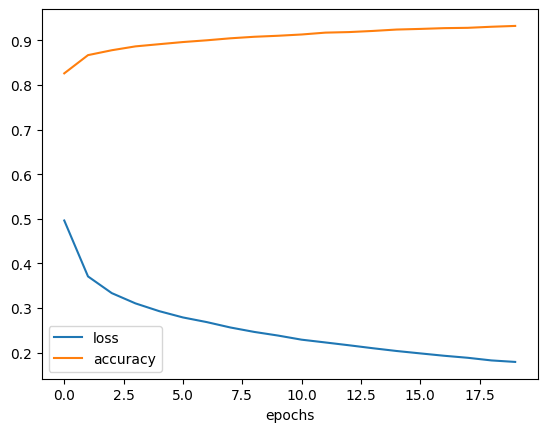

In [55]:
# visualize the model performance
pd.DataFrame(_history.history).plot(xlabel='epochs')
plt.show()

### [3.c] Finding The Ideal Learning Rate

Uuse a callback function on the model during training to lower the loss function value on every epoch by trying an updated learning rate. To find the ideal learning rate, the plot of **learning rate decay curve** can be analaysed to pick the desired value

In [48]:
# create the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

# create the learning rate callback
# this callback will start the learning rate at 1e-3 and increase it by 1e-3 x K every epoch
# the value of K is calculated as 10 ^ (epoch/20)
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# fit the model
history_callback = model.fit(train_images_normalized, 
                             train_labels, 
                             epochs=20, 
                             callbacks=[lr_scheduler])

Epoch 1/20
  22/1875 [..............................] - ETA: 9s - loss: 1.6416 - accuracy: 0.4631

2023-01-19 09:31:31.356161: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 9s 5ms/step - loss: 0.4953 - accuracy: 0.8260 - lr: 0.0010
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3761 - accuracy: 0.8641 - lr: 0.0011
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3412 - accuracy: 0.8755 - lr: 0.0013
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3207 - accuracy: 0.8831 - lr: 0.0014
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3079 - accuracy: 0.8878 - lr: 0.0016
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2979 - accuracy: 0.8890 - lr: 0.0018
Epoch 7/20
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2939 - accuracy: 0.8914 - lr: 0.0020
Epoch 8/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2884 - accuracy: 0.8938 - lr: 0.0022
Epoch 9/20
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2826 - accura

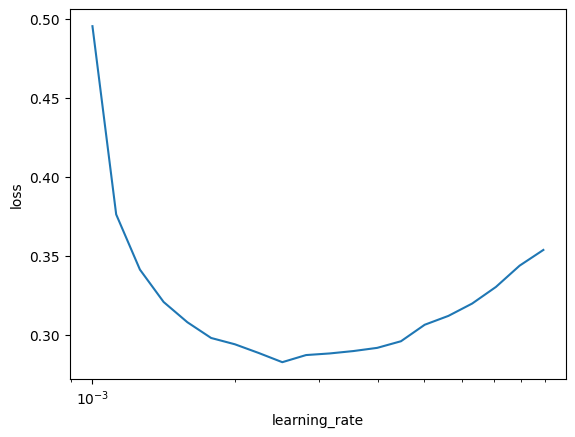

In [50]:
# calculate the learning rates
lrs = 1e-3 * (10**(tf.range(20)/20))

# plot the learning rate decay curve
plt.semilogx(lrs, history_callback.history['loss'])
plt.xlabel('learning_rate')
plt.ylabel('loss')
plt.show()

**NOTE**  

The ideal learning rate from the above curve is **1e-3**!  
Create a neural network model with the ideal learning rate and fit on the input data

In [56]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              metrics=['accuracy'])

lr_ideal_model = model.fit(train_images_normalized,
                           train_labels,
                           epochs=20)

Epoch 1/20
  23/1875 [..............................] - ETA: 8s - loss: 1.5332 - accuracy: 0.4810

2023-01-19 09:58:59.427534: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 9s 5ms/step - loss: 0.4943 - accuracy: 0.8258
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3714 - accuracy: 0.8652
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3346 - accuracy: 0.8777
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3113 - accuracy: 0.8863
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2948 - accuracy: 0.8912
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2788 - accuracy: 0.8964
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2697 - accuracy: 0.9004
Epoch 8/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2565 - accuracy: 0.9044
Epoch 9/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2478 - accuracy: 0.9086
Epoch 10/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2393 - accurac

## [4] Evaluating The Models

Some common ways to evaluate the models:

- Evaluate the model fit across the test set for different models and compare the evaluation metrics
- Generate the confusion matrix and plot the same to get a view of the commonly confused classes

In [58]:
# evaluate the vanilla model
vloss, vacc = _model.evaluate(test_images_normalized, test_labels)
(vloss, vacc)

313/313 [==============================] - 1s 5ms/step - loss: 0.3784 - accuracy: 0.8846


(0.37838560342788696, 0.884600043296814)

In [61]:
# evaluate the model with ideal learning rate
iloss, iacc = model.evaluate(test_images_normalized, test_labels)
(iloss, iacc)

313/313 [==============================] - 1s 4ms/step - loss: 0.3802 - accuracy: 0.8848


(0.38019394874572754, 0.8848000168800354)

In [68]:
y_probs = model.predict(test_images_normalized)
y_preds = np.argmax(y_probs, axis=1)

313/313 [==============================] - 0s 2ms/step


In [69]:
test_labels.shape, y_preds.shape

((10000,), (10000,))

In [80]:
wrong_predictions = np.array(y_preds != test_labels)

In [90]:
total_wrong = wrong_predictions.sum()
percent_wrong = 100 * (total_wrong / y_preds.shape[0])
percent_wrong

11.52

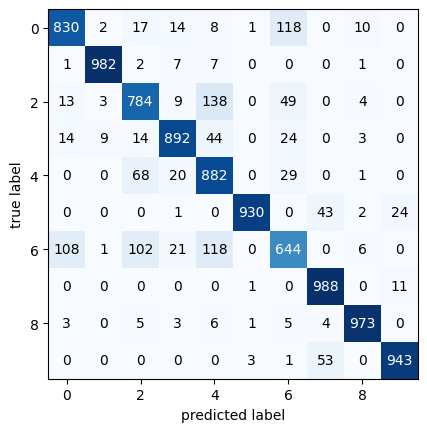

In [102]:
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

# calculate the confusion matrix
cm = confusion_matrix(test_labels, y_preds)

# plot the confusion matrix
fig, ax = plot_confusion_matrix(cm)
plt.show()

In [109]:
y_true = np.array([classes[i] for i in test_labels])
y_predicted = np.array([classes[i] for i in y_preds])

y_true.shape, y_predicted.shape

((10000,), (10000,))

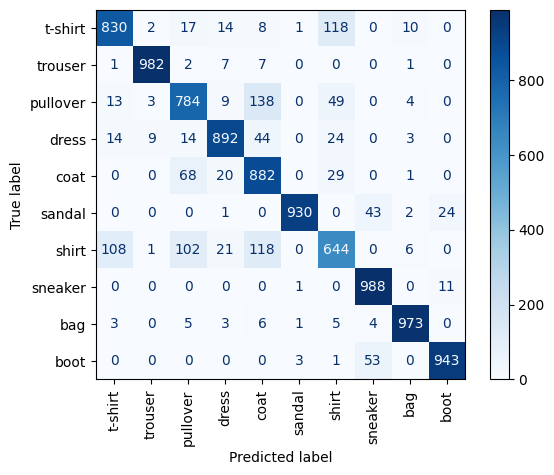

In [116]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# create the confusion matrix
conf_mat = confusion_matrix(y_true, y_predicted, labels=classes)

# generate the plot values for confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, 
                              display_labels=classes)

disp.plot(xticks_rotation='vertical', cmap=plt.cm.Blues)
plt.show()

### [4.a] Prediction On Random Images

Define a function that generates predictions on a randomly picked image from the dataset and displays the probabilty of prediction along with actual and predicted class. If the prediction is correct display in green and if the prediction is incorrect then display in red.

In [136]:
def plot_random_image(model, X, y, labels):
    
    # generate a random integer
    i = np.random.randint(0, len(X))
    
    # make prediction on randomly selected image
    image = X[i]
    predictions = model.predict(image.reshape(1,28,28))
    
    # get the prediction and actual labels
    y_pred = labels[np.argmax(predictions)]
    y_true = labels[y[i]]
    
    # probability of predictions
    p = 100 * tf.reduce_max(predictions)
    
    # plot the image
    plt.imshow(image, cmap=plt.cm.binary)
    
    if y_pred == y_true:
        color = 'green'
    else:
        color = 'red'
        
    # add label information
    plt.xlabel(f'predicted: {y_pred} ({"%.2f" % p}%)\nactual: {y_true}',
               color=color)

1/1 [==============================] - 0s 10ms/step


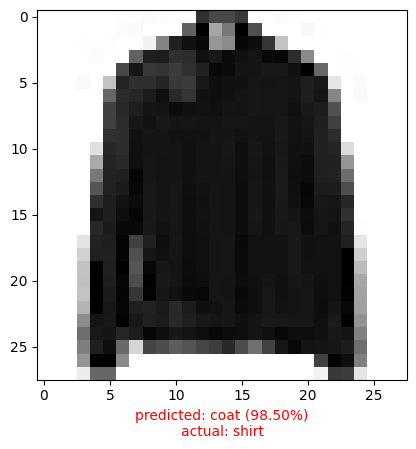

In [149]:
plot_random_image(model=model,
                  X=test_images_normalized,
                  y=test_labels,
                  labels=classes
)

## [5] Visualizing The Patterns From The Layers

In [5]:
X_train = train_images / 255.0
X_test = test_images / 255.0

X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy']
)

history = model.fit(X_train,
                    train_labels,
                    epochs=30
)

Metal device set to: Apple M1 Pro
Epoch 1/30


2023-01-19 12:52:43.446970: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-19 12:52:43.447163: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2023-01-19 12:52:43.628165: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


  11/1875 [..............................] - ETA: 9s - loss: 2.2532 - accuracy: 0.1477  

2023-01-19 12:52:43.772719: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 10s 5ms/step - loss: 0.8503 - accuracy: 0.7253
Epoch 2/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5352 - accuracy: 0.8211
Epoch 3/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4910 - accuracy: 0.8328
Epoch 4/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4682 - accuracy: 0.8415
Epoch 5/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4555 - accuracy: 0.8424
Epoch 6/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4417 - accuracy: 0.8479
Epoch 7/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4316 - accuracy: 0.8504
Epoch 8/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4240 - accuracy: 0.8526
Epoch 9/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4120 - accuracy: 0.8556
Epoch 10/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4064 - accura

In [7]:
# summary of the trained model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 10)                60        
                                                                 
Total params: 7,965
Trainable params: 7,965
Non-trainable params: 0
_________________________________________________________________


In [8]:
# layers of the trained model
model.layers

In [9]:
# get the learned parameters for a given network
weights, biases = model.layers[1].get_weights()
weights.shape, biases.shape

((784, 10), (10,))

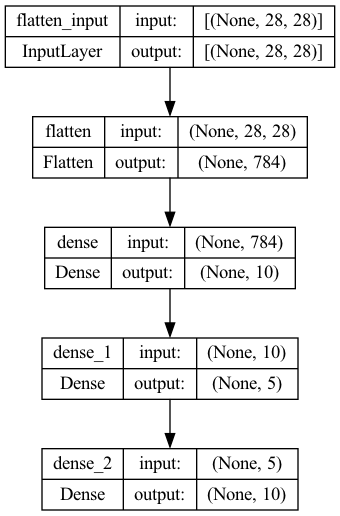

In [10]:
from tensorflow.keras.utils import plot_model

# plot the outputs of each layer
plot_model(model, show_shapes=True)